In [1]:
import h2o

In [2]:
h2o.init(max_mem_size="2G")

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_151"; Java(TM) SE Runtime Environment (build 1.8.0_151-b12); Java HotSpot(TM) 64-Bit Server VM (build 25.151-b12, mixed mode)
  Starting server from /anaconda3/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/xb/8f85vdvd2rz4d63twdbvtdgw0000gn/T/tmpmjd_vaaw
  JVM stdout: /var/folders/xb/8f85vdvd2rz4d63twdbvtdgw0000gn/T/tmpmjd_vaaw/h2o_narensham_started_from_python.out
  JVM stderr: /var/folders/xb/8f85vdvd2rz4d63twdbvtdgw0000gn/T/tmpmjd_vaaw/h2o_narensham_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.0.1
H2O cluster version age:,15 days
H2O cluster name:,H2O_from_python_narensham_8ecbzk
H2O cluster total nodes:,1
H2O cluster free memory:,1.778 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"


In [123]:
docker_data_path = "/Users/narensham/Downloads/sentiment labelled sentences/yelp_labelled.txt"


In [124]:
docker_data_path

'/Users/narensham/Downloads/sentiment labelled sentences/yelp_labelled.txt'

In [136]:
import pandas as pd
import numpy as np

tsv_file='/Users/narensham/Downloads/sentiment labelled sentences/yelp_labelled.txt'
csv_table=pd.read_table(tsv_file,sep='\t',header=None,names = ["Review", "Response"] )
csv_table.to_csv('reviews.csv',index=False)

print(type(csv_table))
csv_table
reviews = h2o.h2o.H2OFrame(csv_table)



<class 'pandas.core.frame.DataFrame'>
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [128]:
reviews

Review,Response
Wow... Loved this place.,1
Crust is not good.,0
Not tasty and the texture was just nasty.,0
Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.,1
The selection on the menu was great and so were the prices.,1
Now I am getting angry and I want my damn pho.,0
Honeslty it didn't taste THAT fresh.),0
The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.,0
The fries were great too.,1
A great touch.,1


In [137]:
reviews["Response"].table()

Response,Count
0,500
1,500


In [138]:
STOP_WORDS = ["ax","i","you","edu","s","t","m","subject","can","lines","re","what",
               "there","all","we","one","the","a","an","of","or","in","for","by","on",
               "but","is","in","a","not","with","as","was","if","they","are","this","and","it","have",
               "from","at","my","be","by","not","that","to","from","com","org","like","likes","so"]

In [134]:

def tokenize(sentences, stop_word = STOP_WORDS):
    tokenized = sentences.tokenize("\\W+")
    tokenized_lower = tokenized.tolower()
    tokenized_filtered = tokenized_lower[(tokenized_lower.nchar() >= 2) | (tokenized_lower.isna()),:]
    tokenized_words = tokenized_filtered[tokenized_filtered.grep("[0-9]",invert=True,output_logical=True),:]
    tokenized_words = tokenized_words[(tokenized_words.isna()) | (~ tokenized_words.isin(STOP_WORDS)),:]
    return tokenized_words

In [140]:
words = tokenize(reviews["Review"])


In [141]:
words.head()


C1
wow
loved
place
""
crust
good
""
tasty
texture
just


In [142]:
from h2o.estimators.word2vec import H2OWord2vecEstimator


w2v_model = H2OWord2vecEstimator(vec_size = 100, model_id = "w2v.hex")
w2v_model.train(training_frame=words)

word2vec Model Build progress: |██████████████████████████████████████████| 100%


In [148]:
w2v_model.find_synonyms("good", count = 5)


OrderedDict([('any', 0.9962106943130493),
             ('beef', 0.996195912361145),
             ('tasty', 0.9961864948272705),
             ('selection', 0.995969295501709),
             ('has', 0.9958986639976501)])

In [149]:
review_vecs = w2v_model.transform(words, aggregate_method = "AVERAGE")


In [150]:
ext_reviews = reviews.cbind(review_vecs)
ext_reviews

Review,Response,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26,C27,C28,C29,C30,C31,C32,C33,C34,C35,C36,C37,C38,C39,C40,C41,C42,C43,C44,C45,C46,C47,C48,C49,C50,C51,C52,C53,C54,C55,C56,C57,C58,C59,C60,C61,C62,C63,C64,C65,C66,C67,C68,C69,C70,C71,C72,C73,C74,C75,C76,C77,C78,C79,C80,C81,C82,C83,C84,C85,C86,C87,C88,C89,C90,C91,C92,C93,C94,C95,C96,C97,C98,C99,C100
Wow... Loved this place.,1,0.0305173,0.0175541,-0.0576459,0.0510853,-0.047845,-0.0398205,-0.0765224,0.0374798,-0.00127996,0.0308415,0.0710056,0.0255545,0.0374585,-0.0209674,0.0729731,0.039661,0.00777145,0.0149295,0.0135909,-0.00940728,-0.039358,0.0045629,0.0671427,-0.0339481,-0.00755144,-0.00575592,-0.0685929,-0.0682189,-0.00814223,-0.0279974,-0.0287389,0.00237021,0.0321404,0.0234804,0.0208277,-0.0341468,-0.0292925,-0.00852861,-0.00959041,0.0298968,-0.0473865,-0.0285715,0.0144567,-0.00618974,-0.0457551,-0.0107684,0.0891151,0.014998,-0.0460126,-0.0302597,0.0313437,-0.0147185,0.0250111,-0.00701382,-0.0170174,-0.0138855,0.0184061,0.0388042,-0.0251336,0.0548319,-0.0202333,0.00458801,-0.00791585,0.0414682,0.00859042,0.0157529,-0.0377039,0.0334,-0.00148068,-0.075409,0.0471373,0.0492487,0.00899016,0.00606873,0.0127755,0.0370748,0.0683728,0.004692,0.0253746,0.0300285,0.0689641,0.0454467,-0.00437894,0.0336626,0.00274577,0.00258641,-0.0473014,-0.0219614,-0.0109404,-0.00226253,0.00696371,0.0245398,0.0187225,0.0213948,0.0055568,0.00233322,-0.0349367,0.0233755,0.0128391,-0.0274965
Crust is not good.,0,0.0437792,0.0214361,-0.0760255,0.0713201,-0.0641388,-0.0628254,-0.106834,0.0479435,-0.00595153,0.0381223,0.100491,0.0299858,0.060311,-0.0324149,0.103368,0.0534029,0.00587236,0.0318914,0.0220649,-0.00356697,-0.0564038,0.00368043,0.0942116,-0.0478993,-0.0131273,-0.0106299,-0.0966832,-0.0930972,-0.0161023,-0.0282471,-0.0340591,0.00305596,0.0409709,0.02441,0.0283833,-0.0334325,-0.0457432,-0.0152521,-0.00326394,0.0459336,-0.0670292,-0.042389,0.0111922,-0.0100143,-0.0568149,-0.00711401,0.123613,0.0199259,-0.0556739,-0.0473441,0.0444799,-0.0255426,0.0299913,-0.0132451,-0.0237517,-0.0165788,0.0278089,0.0570494,-0.0381073,0.0769652,-0.0214238,0.00481206,-0.0161972,0.0518918,0.0047002,0.0200333,-0.0417524,0.0555611,0.0121466,-0.103637,0.0551236,0.0769891,-0.00233368,0.00725453,0.022365,0.0464668,0.0948183,0.00564161,0.0279779,0.0398661,0.0848617,0.0603579,-0.00890949,0.0523955,0.0036236,0.0037441,-0.0641437,-0.0413771,-0.00927251,-0.0134889,0.013549,0.0325606,0.028653,0.0304876,0.0142154,0.00788176,-0.0535136,0.0311281,0.0234579,-0.0397426
Not tasty and the texture was just nasty.,0,0.0440478,0.0275222,-0.0790401,0.0699487,-0.0649007,-0.0599934,-0.101565,0.0480304,-0.00492378,0.0338798,0.0960672,0.0306766,0.0504695,-0.0285912,0.0998354,0.0514365,0.00771078,0.0259316,0.0147981,-0.00854294,-0.0503832,0.000266629,0.0918535,-0.0483871,-0.0081012,-0.00731055,-0.0933251,-0.0921846,-0.0131352,-0.0327351,-0.036702,0.00297397,0.0457149,0.0285145,0.026469,-0.0381528,-0.0441511,-0.0182388,-0.00718906,0.038357,-0.0634769,-0.0404515,0.0148102,-0.0109724,-0.062361,-0.00798724,0.119616,0.0215408,-0.0560556,-0.0412266,0.0416953,-0.0238718,0.0256721,-0.00731694,-0.0223795,-0.0212148,0.0242046,0.0497255,-0.0340997,0.0725091,-0.0203243,0.00411312,-0.0139603,0.0490311,0.00892819,0.0183629,-0.0449824,0.0471428,0.00577504,-0.099184,0.0565254,0.0681913,0.00472853,0.0104098,0.0227591,0.047166,0.0960688,0.00854554,0.0342712,0.042108,0.0845024,0.0579815,-0.00563328,0.0474888,0.00618619,0.0080574,-0.0642508,-0.0322116,-0.0101788,-0.00631339,0.0120128,0.0294796,0.0289176,0.0278533,0.00971164,0.00403212,-0.0507071,0.0297704,0.0201693,-0.0364076
Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.,1,0.0431314,0.0217065,-0.0708625,0.0621968,-0.0580134,-0.0509134,-0.0917197,0.0426209,-0.00526342,0.0339586,0.0854639,0.0307948,0.0494994,-0.0220724,0.0887504,0.0446647,0.00967285,0.0246356,0.0125992,-0.00514515,-0.0493812,0.0034338,0.084219,-0.0469693,-

In [151]:
data_split = ext_reviews.split_frame(ratios=[0.8])

ext_train = data_split[0]
ext_test = data_split[1]



In [152]:



print("Build a basic GBM model")
gbm_model = H2OGradientBoostingEstimator()
gbm_model.train(x = ext_reviews.names,
                y="Response", 
                training_frame = data_split[0], 
                validation_frame = data_split[1])

Build a basic GBM model
gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [153]:
def predict(job_title,w2v, gbm):
    words = tokenize(h2o.H2OFrame(job_title).ascharacter())
    job_title_vec = w2v.transform(words, aggregate_method="AVERAGE")
    print(gbm.predict(test_data=job_title_vec))

In [157]:
print(predict(["a huge selection"], w2v_model, gbm_model))
print(predict(["a little"], w2v_model, gbm_model))


Parse progress: |█████████████████████████████████████████████████████████| 100%
gbm prediction progress: |████████████████████████████████████████████████| 100%


predict
0.649637



None
Parse progress: |█████████████████████████████████████████████████████████| 100%
gbm prediction progress: |████████████████████████████████████████████████| 100%


predict
0.493106



None


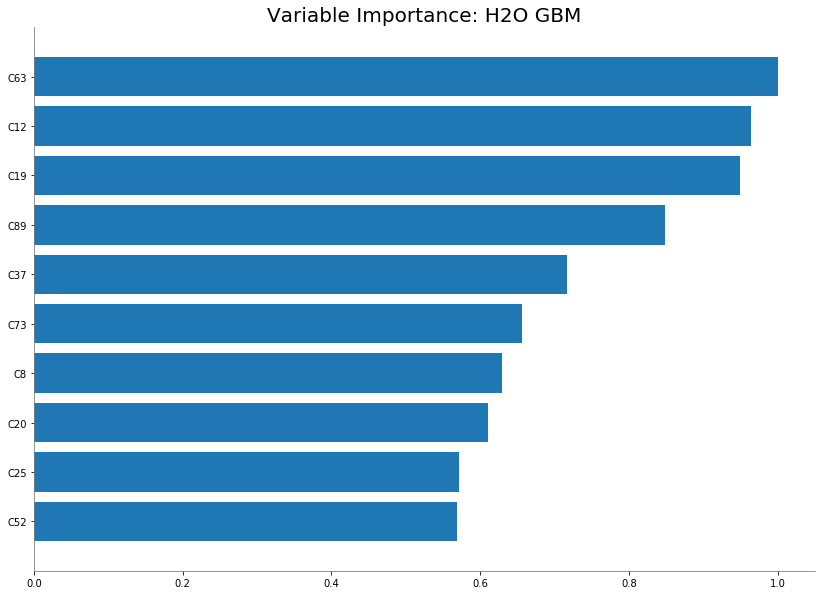

In [158]:
plt=gbm_model.varimp_plot()


In [159]:
h2o.cluster().shutdown()


H2O session _sid_9cd5 closed.
